In [1]:
import argparse
import csv
import sys

import itertools
import MDAnalysis as mda

import matplotlib
matplotlib.use('Agg')  # noqa
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import numpy.linalg
from MDAnalysis.analysis.dihedrals import Ramachandran
import MDAnalysis as mda
from MDAnalysis.lib.distances import calc_dihedrals


import numpy.linalg
import numpy as np

import seaborn as sns
from collections import namedtuple

In [2]:
import numpy.linalg

pdb = "step3_charmm2omm.pdb"
dcd = "step5_1.dcd"
rgyr_selection = 'segid PROF and backbone'

u = mda.Universe(pdb, dcd)        # always start with a Universe
nterm = u.PROF.atoms.N[0]   # can access structure via segid (s4AKE) and atom name
cterm = u.PROF.atoms.C[-1]  # ... takes the last atom named 'C'
bb = u.select_atoms('segid PROF and backbone')  # a selection (a AtomGroup)
Rgyr = []
D = []
for ts in u.trajectory:     # iterate through all frames
  r = cterm.position - nterm.position # end-to-end vector from atom positions
  d = numpy.linalg.norm(r)  # end-to-end distance
  rgyr = bb.radius_of_gyration()  # method of a AtomGroup; updates with each frame
  Rgyr.append((u.trajectory.time, rgyr))
  D.append((u.trajectory.time, d))
  #print("frame = %d: d = %f Angstroem, Rgyr = %f Angstroem" % (ts.frame, d, rgyr))
Rgyr = np.array(Rgyr)
D = np.array(D)

/home/cbarnett/anaconda3/envs/mdanalysis/lib/python3.8/site-packages/MDAnalysis/core/universe.py:514: DeprecationWarning: Instant selector Universe.<segid> is deprecated and will be removed in 1.0. Use SegmentGroup[SegmentGroup.segids == '<segid>'] instead.
  warnings.warn("Instant selector Universe.<segid> "
/home/cbarnett/anaconda3/envs/mdanalysis/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:518: DeprecationWarning: Instant selector AtomGroup['<name>'] or AtomGroup.<name> is deprecated and will be removed in 1.0. Use AtomGroup.select_atoms('name <name>') instead.
  warnings.warn("Instant selector AtomGroup['<name>'] or AtomGroup.<name> "


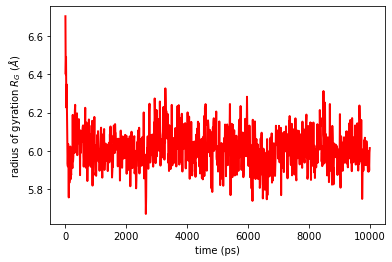

In [3]:
ax = plt.subplot(111)
ax.plot(Rgyr[:,0], Rgyr[:,1], 'r-', lw=2, label=r"$R_G$")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"radius of gyration $R_G$ ($\AA$)")
ax.figure.savefig("Rgyr.pdf")
plt.draw()

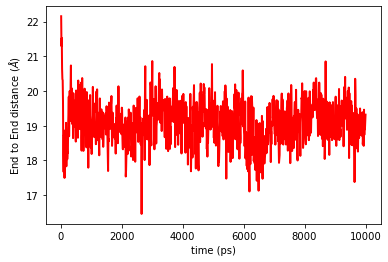

In [4]:
ay = plt.subplot(111)
ay.plot(D[:,0], D[:,1], 'r-', lw=2, label=r"$R_D$")
ay.set_xlabel("time (ps)")
ay.set_ylabel(r"End to End distance ($\AA$)")
ay.figure.savefig("D.pdf")
plt.draw()

Text(0, 0.5, 'radius of gyration $R_G$ ($\\AA$)')

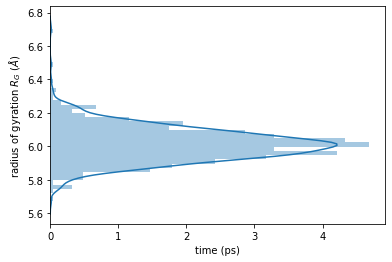

In [12]:
ax = sns.distplot(Rgyr[:,1], vertical=True)
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"radius of gyration $R_G$ ($\AA$)")

Text(0, 0.5, 'End to End distance ($\\AA$)')

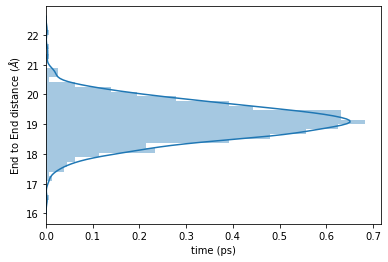

In [13]:
import seaborn as sns, numpy as np
ay = sns.distplot(D[:,1], vertical=True)
ay.set_xlabel("time (ps)")
ay.set_ylabel(r"End to End distance ($\AA$)")